In [1]:
import pandas as pd 
from sklearn import datasets

iris = datasets.load_iris()
data = pd.DataFrame(iris.data, columns=iris.feature_names)

In [2]:
data 

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2
...,...,...,...,...
145,6.7,3.0,5.2,2.3
146,6.3,2.5,5.0,1.9
147,6.5,3.0,5.2,2.0
148,6.2,3.4,5.4,2.3


In [3]:
data.head(5)

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


In [4]:
from sklearn.cluster import KMeans

In [5]:


KMeans = KMeans(n_clusters=3, random_state=42)
KMeans.fit(data)

KMeans(n_clusters=3, random_state=42)

In [6]:
data['KMeans_Cluster'] = KMeans.labels_

In [7]:
from scipy.cluster.hierarchy import dendrogram, linkage
import matplotlib.pyplot as plt

In [8]:
linked = linkage(data.iloc[:, :-1], method='ward')

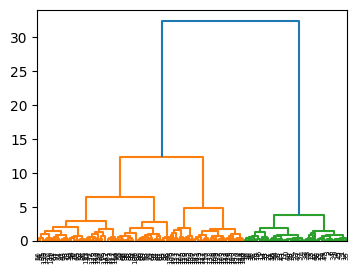

In [9]:
plt.figure(figsize=(4, 3))
dendrogram(linked, orientation='top', distance_sort='descending', show_leaf_counts=True)
plt.show()

In [10]:
from sklearn.cluster import DBSCAN

dbscan = DBSCAN(eps=0.5, min_samples=5)
dbscan.fit(data.iloc[:, :-1])
data['DBSCAN_Cluster'] = dbscan.labels_

In [11]:
from sklearn.metrics import silhouette_score, davies_bouldin_score


In [12]:
kmeans_silhouette = silhouette_score(data.iloc[:, :-2], data['KMeans_Cluster'])
kmeans_davies_bouldin = davies_bouldin_score(data.iloc[:, :-2], data['KMeans_Cluster'])

In [13]:
dbscan_silhouette = silhouette_score(data.iloc[:, :-2], data['DBSCAN_Cluster'])
dbscan_davies_bouldin = davies_bouldin_score(data.iloc[:, :-2], data['DBSCAN_Cluster'])

In [14]:
print(f"K-Means Silhouette score: {kmeans_silhouette}")
print(f"K-Means Davies-Bouldin Index: {kmeans_davies_bouldin}")

print(f"DBSCAN Silhouette score: {dbscan_silhouette}")
print(f"DBSCAN Davies-Bouldin Index: {dbscan_davies_bouldin}")

K-Means Silhouette score: 0.551191604619592
K-Means Davies-Bouldin Index: 0.6660385791628493
DBSCAN Silhouette score: 0.48603419703456857
DBSCAN Davies-Bouldin Index: 7.222448016359581


In [15]:
import seaborn as sns

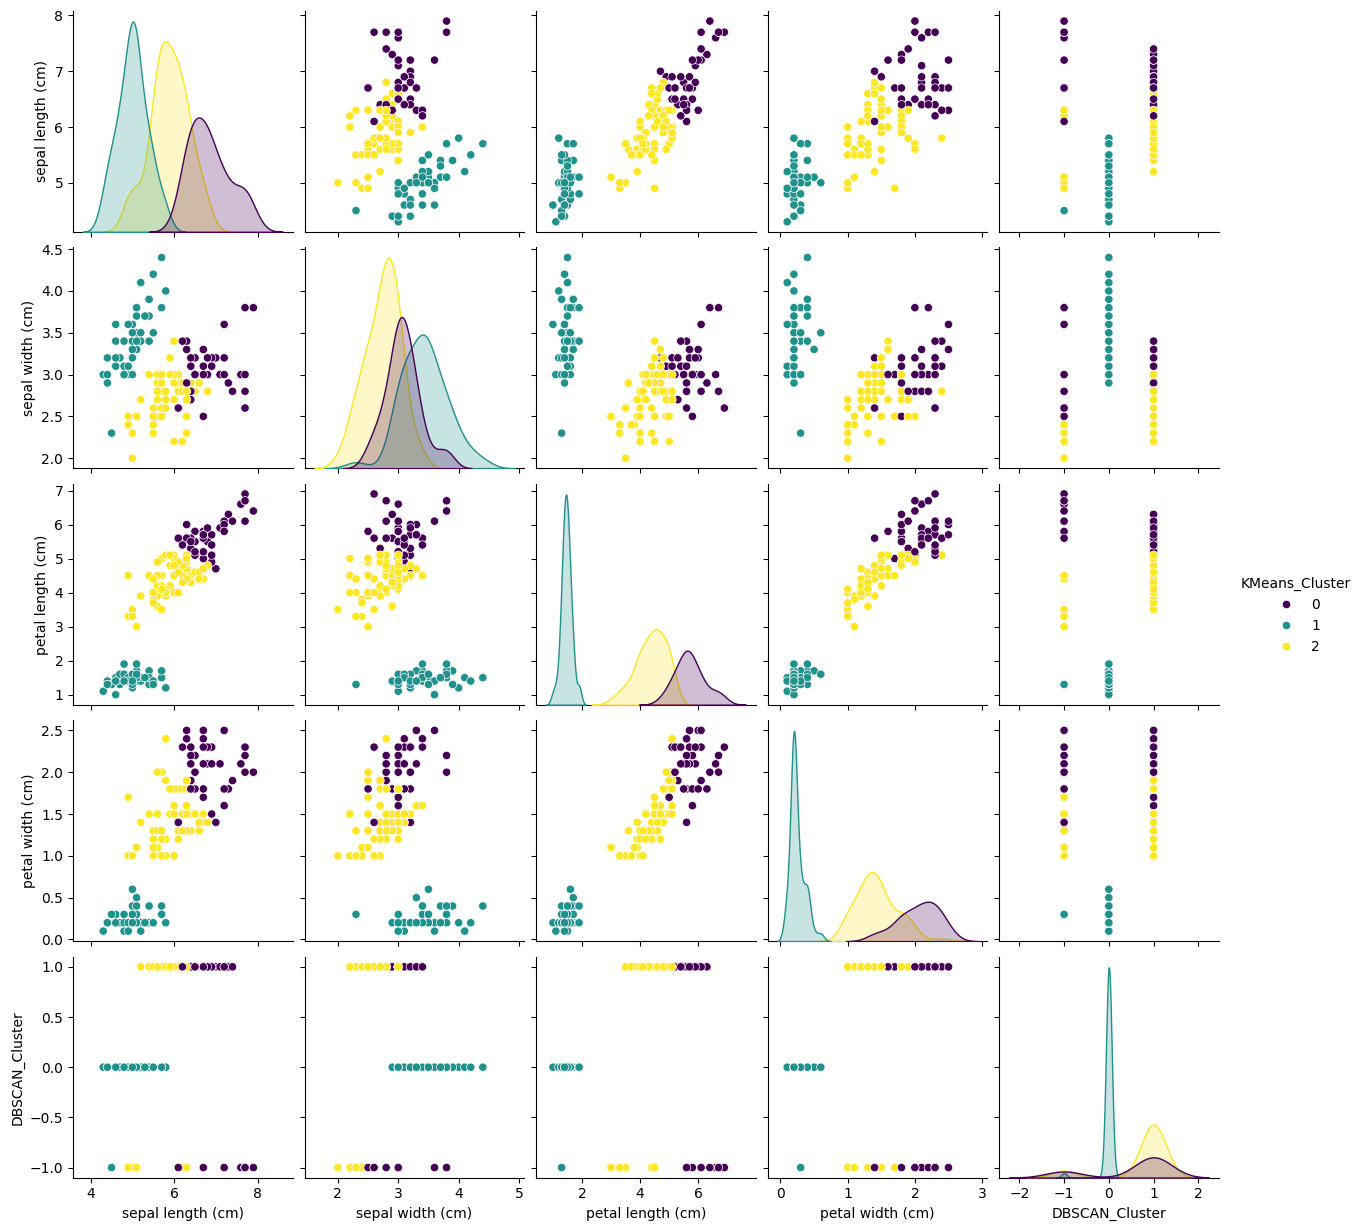

In [16]:
sns.pairplot(data, hue='KMeans_Cluster', palette='viridis')
plt.show()

<Figure size 400x300 with 0 Axes>

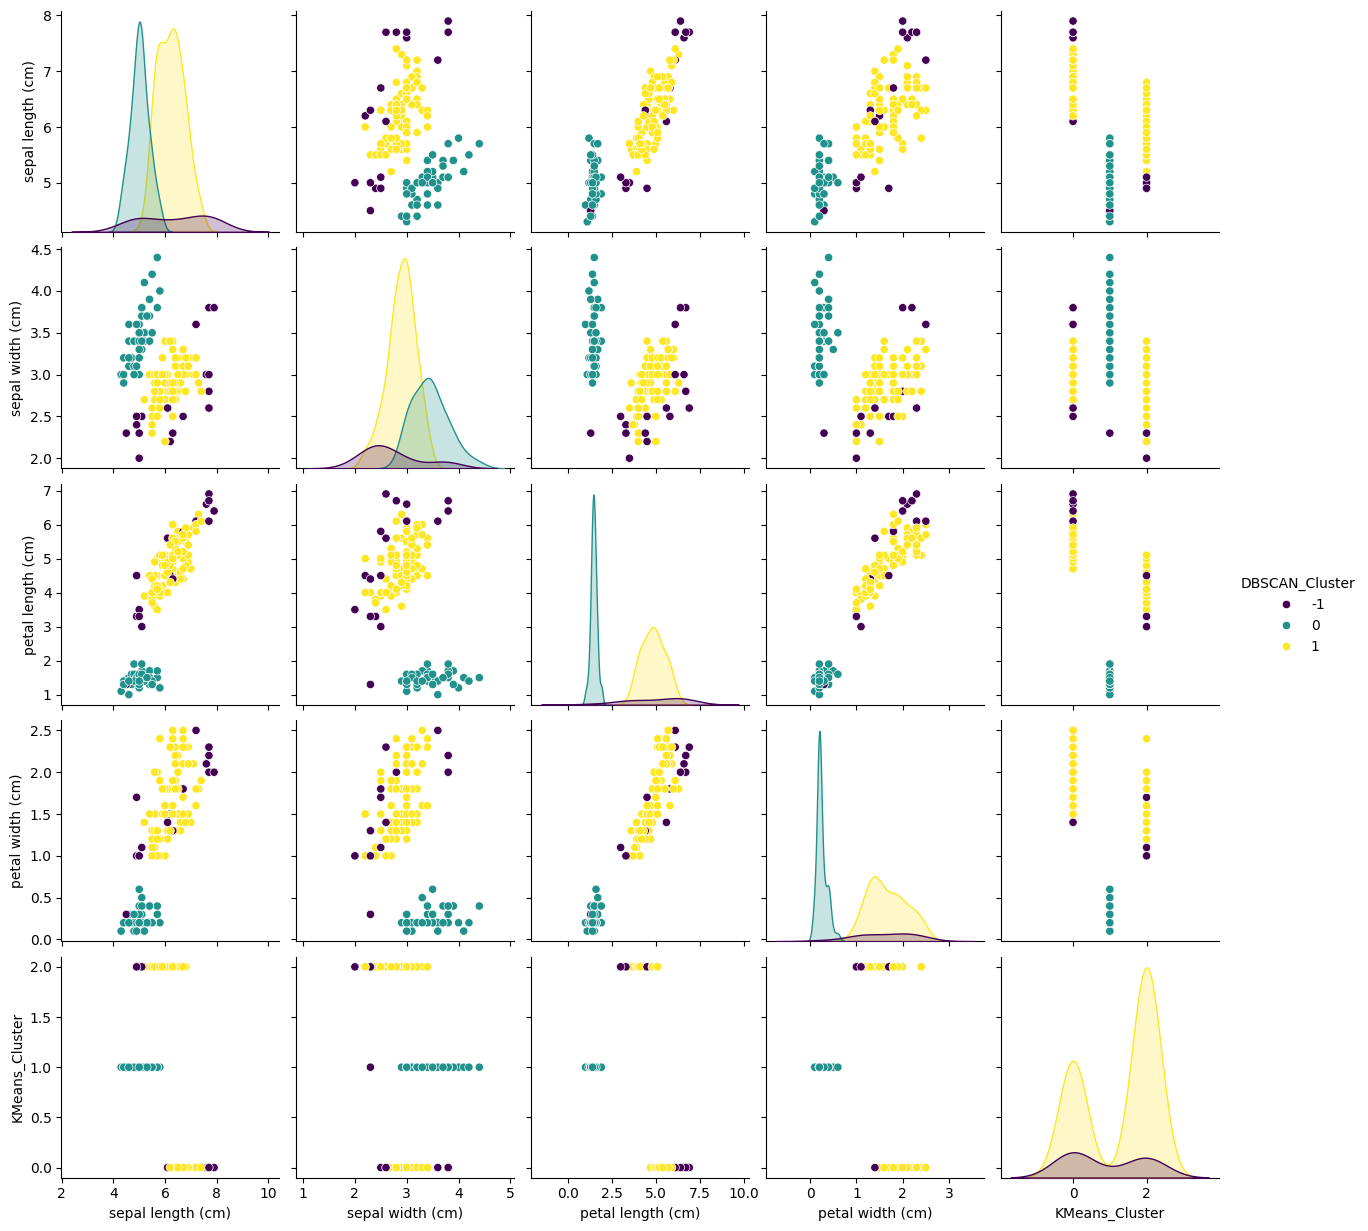

In [17]:
plt.figure(figsize=(4,3))
sns.pairplot(data, hue='DBSCAN_Cluster', palette='viridis')
plt.show()